In [3]:
import pandas as pd
import numpy as np
import os

# Path to the folder containing the CSV files
folder_path = "processed_data"

# Initialize lists to store data and labels
frequency_data = []
labels = []

# Load all CSV files
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # Extract frequency data (columns 2 to 25 assuming 0-based indexing)
        frequency_data.append(df.iloc[:, 1:25].values)
        
        # Extract labels (last column)
        labels.append(df.iloc[:, -1].values)

# Combine all songs' data
frequency_data = np.vstack(frequency_data)
labels = np.concatenate(labels)

global_mean = np.mean(frequency_data)
global_std = np.std(frequency_data)

print(f"Global Mean (all frequency columns): {global_mean}")
print(f"Global Standard Deviation (all frequency columns): {global_std}")

from collections import Counter

# Count occurrences of each label
label_counts = Counter(labels)

# Total number of labels
total_labels = len(labels)

# Calculate percentages
label_percentages = {label: (count / total_labels) * 100 for label, count in label_counts.items()}

# Sort percentages from high to low
sorted_label_percentages = sorted(label_percentages.items(), key=lambda x: x[1], reverse=True)

# Print results
print("Label Percentages Ranked (High to Low):")
for label, percentage in sorted_label_percentages:
    print(f"Label: {label}, Percentage: {percentage:.2f}%")

Global Mean (all frequency columns): 0.5065086545725549
Global Standard Deviation (all frequency columns): 0.752356867657626
Label Percentages Ranked (High to Low):
Label: G:maj, Percentage: 8.36%
Label: C:maj, Percentage: 8.29%
Label: D:maj, Percentage: 8.12%
Label: A:maj, Percentage: 7.57%
Label: X, Percentage: 7.26%
Label: E:maj, Percentage: 6.65%
Label: F:maj, Percentage: 6.12%
Label: N, Percentage: 4.85%
Label: Bb:maj, Percentage: 4.60%
Label: Ab:maj, Percentage: 3.83%
Label: Eb:maj, Percentage: 3.81%
Label: A:min, Percentage: 3.20%
Label: B:maj, Percentage: 3.03%
Label: D:min, Percentage: 3.01%
Label: E:min, Percentage: 2.92%
Label: B:min, Percentage: 2.58%
Label: Db:maj, Percentage: 2.54%
Label: G:min, Percentage: 1.81%
Label: C:min, Percentage: 1.49%
Label: F#:min, Percentage: 1.37%
Label: F:min, Percentage: 1.29%
Label: Gb:maj, Percentage: 1.27%
Label: F#:maj, Percentage: 1.27%
Label: C#:min, Percentage: 1.27%
Label: Eb:min, Percentage: 1.16%
Label: Bb:min, Percentage: 0.78%
L

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(frequency_data)

In [5]:
from sklearn.decomposition import PCA

# Specify the number of principal components (e.g., reduce to 2 components)
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA on the standardized data
principal_components = pca.fit_transform(standardized_data)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

Explained Variance Ratio: [0.11066202 0.10471468]


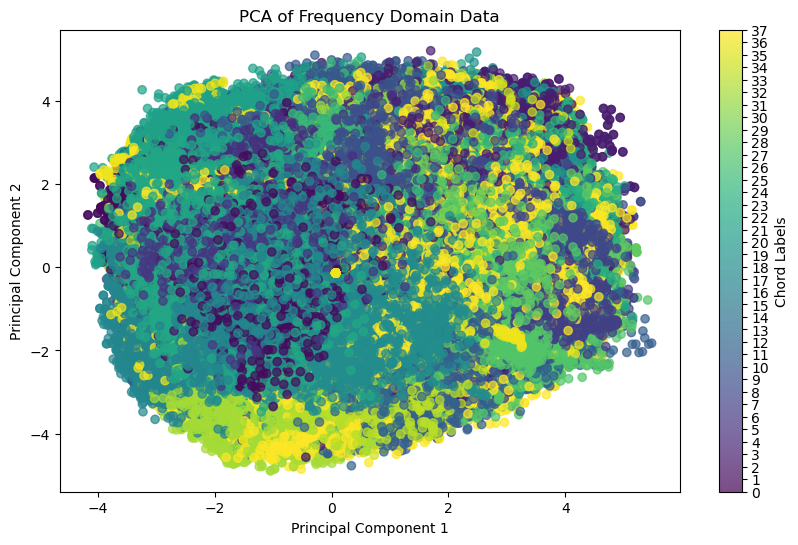

In [7]:
import matplotlib.pyplot as plt

# Map labels to numerical values for visualization
unique_labels = np.unique(labels)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Plot the PCA-transformed data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=numeric_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Chord Labels')
plt.title('PCA of Frequency Domain Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the LDA object
lda = LinearDiscriminantAnalysis(n_components=None)  # Set None to compute the maximum number of components

# Fit LDA to the data and transform
lda_components = lda.fit_transform(frequency_data, labels)

# Check the explained variance ratio
explained_variance = lda.explained_variance_ratio_
print(f"Explained Variance Ratio by LDA components: {explained_variance}")

# Optionally, reduce to 2 components for visualization
lda_2d = LinearDiscriminantAnalysis(n_components=2)
lda_2d_components = lda_2d.fit_transform(frequency_data, labels)

Explained Variance Ratio by LDA components: [1.92674828e-01 1.76500956e-01 1.06907022e-01 9.50317081e-02
 7.27245978e-02 6.78750662e-02 6.11270209e-02 5.68039393e-02
 4.37793306e-02 3.95501457e-02 2.68125356e-02 2.29257117e-02
 8.25298951e-03 7.85766899e-03 5.64460435e-03 4.52086577e-03
 3.37362272e-03 2.88179347e-03 2.07867777e-03 1.09737964e-03
 8.28655224e-04 3.43954955e-04 2.37741977e-04 1.69183455e-04]


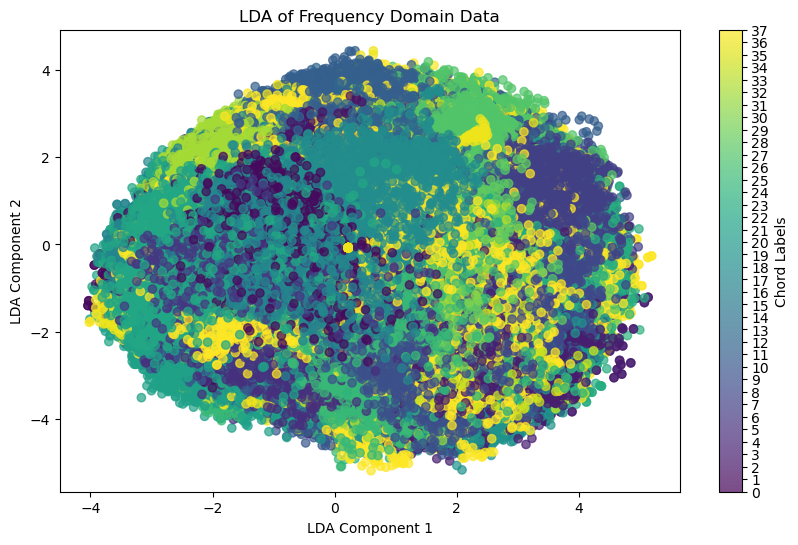

In [9]:
import matplotlib.pyplot as plt

# Map labels to numerical values for visualization
unique_labels = np.unique(labels)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Plot the LDA-transformed data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(lda_2d_components[:, 0], lda_2d_components[:, 1], c=numeric_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Chord Labels')
plt.title('LDA of Frequency Domain Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define perplexity values (low, medium, high)
perplexities = [5, 30, 50]

# Initialize a figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Map labels to numerical values for visualization
unique_labels = np.unique(labels)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Apply t-SNE for each perplexity
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(frequency_data)
    
    # Plot the results
    axes[i].scatter(tsne_result[:, 0], tsne_result[:, 1], c=numeric_labels, cmap='viridis', alpha=0.7)
    axes[i].set_title(f"t-SNE with Perplexity {perplexity}")
    axes[i].set_xlabel("t-SNE Dimension 1")
    axes[i].set_ylabel("t-SNE Dimension 2")

# Adjust layout
plt.tight_layout()
plt.show()